In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from time import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()
type(iris)

sklearn.utils.Bunch

#### Bunch is new data structure for built-in datasets

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
x=iris.data
y=iris.target

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris['DESCR']

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [7]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [9]:
#data is continous so we use gaussian naive_bayes
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
y_pred=gnb.predict(x_test)
print('accuracy is',metrics.accuracy_score(y_test,y_pred)*100,'%')

accuracy is 96.66666666666667 %


In [11]:
cm=confusion_matrix(y_test,y_pred)
print('confusion matrix ',cm,sep='\n')

confusion matrix 
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


### --------------------------------------------------------------------------------------------------------------------------------------------------------

# Adult dataset - Discrete

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [17]:
path='D:\term2\machine learning'

In [18]:
data=pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [19]:
type(data)

pandas.core.frame.DataFrame

In [20]:
data['marital.status'].dtype

dtype('O')

In [21]:
data['income'].dtype

dtype('O')

In [25]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column in data.columns:
    if data[column].dtype == type(object):
        data[column] == le.fit_transform(data[column])
        
data.head()    

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,186061,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,140359,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,264663,15,10,5,10,3,4,0,0,3900,40,39,0


In [31]:
x=data.iloc[:,:-1]
y=data['income']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
mnb=MultinomialNB()

In [40]:
from time import time
print('start training')
tstart=time()
mnb.fit(x_train,y_train)
print('training time is ',round(time()-tstart,3), 'seconds')

start training
training time is  0.012 seconds


In [41]:
y_pred=mnb.predict(x_test)

In [47]:
print('accuracy score is ',metrics.accuracy_score(y_test,y_pred)*100,'%')


accuracy score is  78.81160755412252 %


In [49]:
cm=confusion_matrix(y_test,y_pred)
print(cm,sep='\n')

[[4749  217]
 [1163  384]]


In [50]:
#roc curve
#prob=mnb.predict_proba(x_test)#
prob

array([[1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       ...,
       [6.23732292e-24, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00]])

In [54]:
#prob_pos=prob[:,1]#
fpr,tpr,threshold = metrics.roc_curve(y_test,prob_pos)
roc_curve=metrics.auc(fpr,tpr)
print('area under the curve ',roc_curve)

area under the curve  0.6058733974087792


Text(0, 0.5, 'tpr')

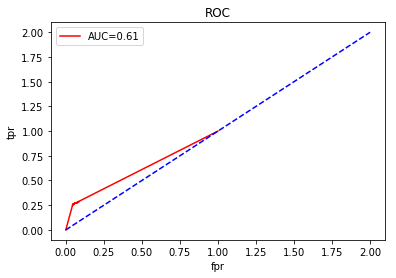

In [62]:
plt.title('ROC')
plt.plot(fpr,tpr,'red',label='AUC=%0.2f' %roc_curve)
plt.legend(loc='upper left')

#plt.plot([0,1],[0,1],color='blue',linestyle='--')#
plt.xlabel('fpr')
plt.ylabel('tpr')